In [1]:
import numpy as np
import matplotlib.pyplot as plt
from your_DBSCAN import my_DBSCAN, plot_iris, visualize_dbscan, estime_minpts, estime_eps

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

import pandas as pd

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

colors =['k','r','b','g','c','m',]
n_colors = 6


# grid search

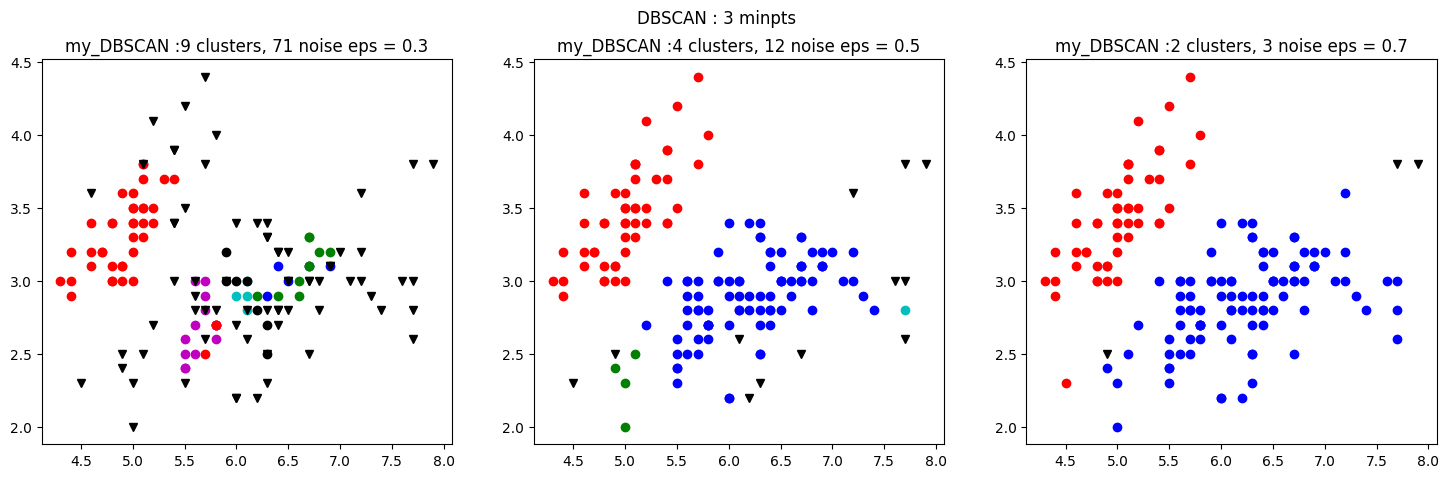

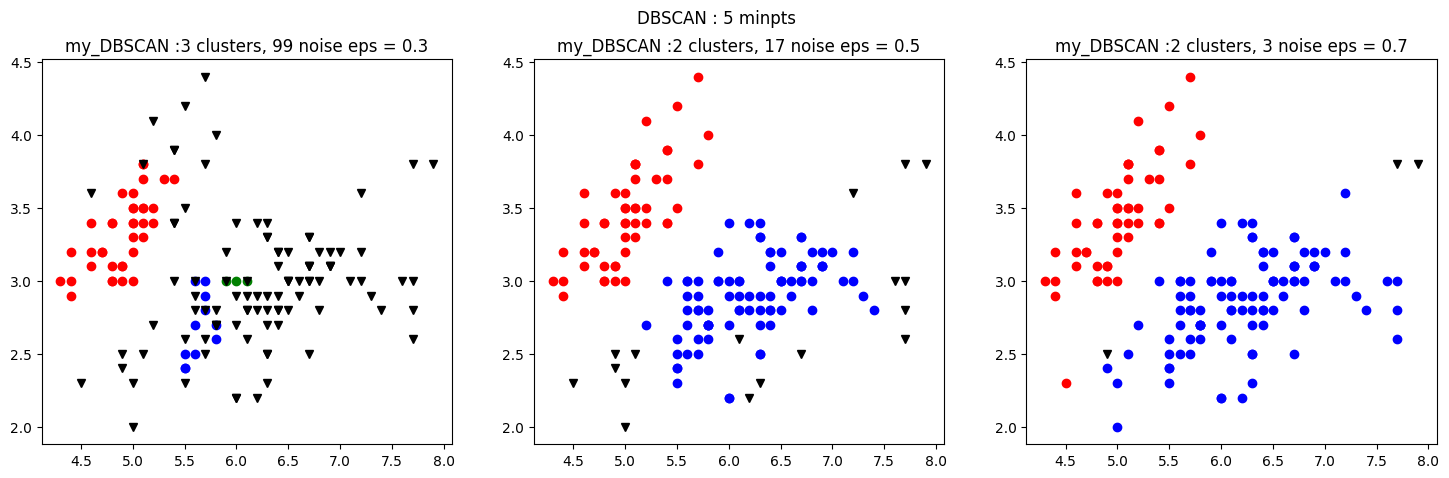

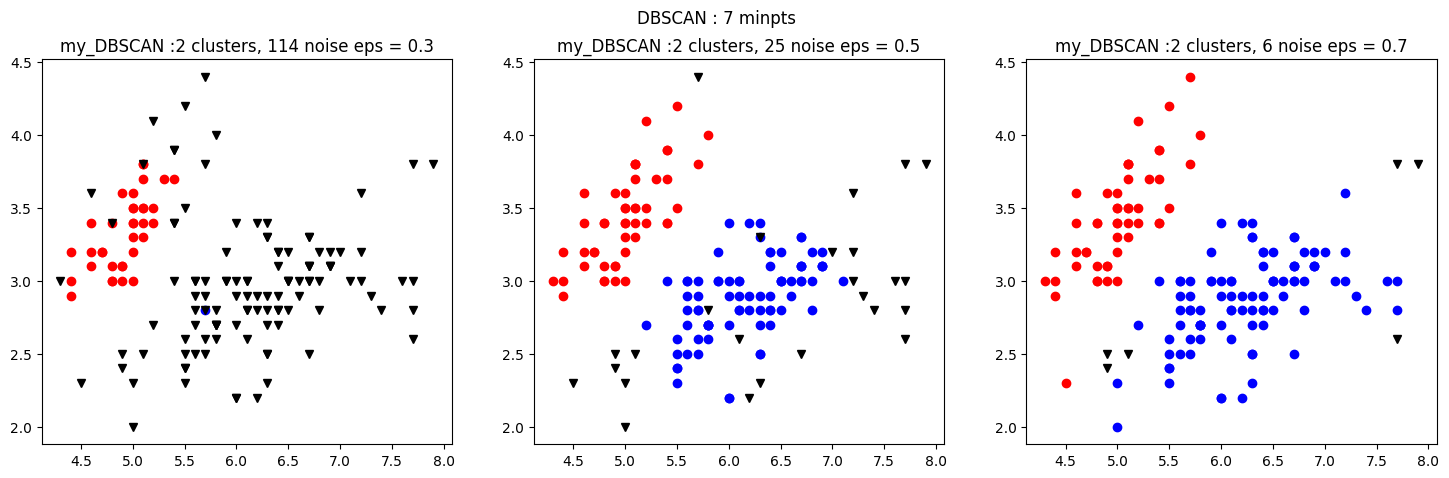

In [3]:
eps =  np.array([ 0.3, 0.5, 0.7])
minpts = np.array([ 3, 5, 7])
results = []

def visualisation_iris(X, minpts):
    i=1
    for t in [0.3,0.5,0.7]:
        my_y = my_DBSCAN(X,t,minpts)
        statistiques = np.unique(my_y,return_counts=True)
        K = len(statistiques[0])-(1 if -1 in statistiques[0] else 0)
        Bruit = [p for p in range(len(my_y)) if my_y[p]==-1]
        results.append([K, len(Bruit)])
        fig = plt.figure(3, figsize=(18, 5))
        fig.suptitle('DBSCAN : '+str(minpts)+' minpts')
        
        plt.subplot(1,3,i)
        for k in range(1,K+1):
            plt.plot(X[my_y==k, 0], X[my_y==k, 1], colors[k%n_colors]+'o')
        plt.plot(X[my_y==-1, 0], X[my_y==-1, 1], 'kv')
    
        plt.title('my_DBSCAN :'+str(K)+' clusters, '+str(len(Bruit))+' noise'+' eps = '+str(t))
        i+=1
    plt.show()

for minpt in minpts:
    visualisation_iris(X, minpt)


In [10]:
results = np.array(results)
results = results.reshape((len(eps),len(minpts),2))
p = pd.DataFrame( index=minpts, columns=eps, )
for i in range(len(eps)):
    for j in range(len(minpts)):
        p.loc[minpts[i],eps[j]] = results[i,j]

print(p)

        0.3      0.5     0.7
3   [9, 71]  [4, 12]  [2, 3]
5   [3, 99]  [2, 17]  [2, 3]
7  [2, 114]  [2, 25]  [2, 6]


: 

In [11]:
print(np.var(results[:, :, 0], axis=0))
print(np.var(results[:, :, 0], axis=1))

[9.55555556 0.88888889 0.        ]
[8.66666667 0.22222222 0.        ]


: 

In [12]:
print(np.var(results[:, :, 1], axis=0))
print(np.var(results[:, :, 1], axis=1))

[317.55555556  28.66666667   2.        ]
[ 909.55555556 1792.88888889 2216.22222222]


: 

In [13]:

var_eps_K = np.var(results[:, :, 0], axis=0)
var_minpts_K = np.var(results[:, :, 0], axis=1)
var_eps_Bruit = np.var(results[:, :, 1], axis=0)
var_minpts_Bruit = np.var(results[:, :, 1], axis=1)

: 

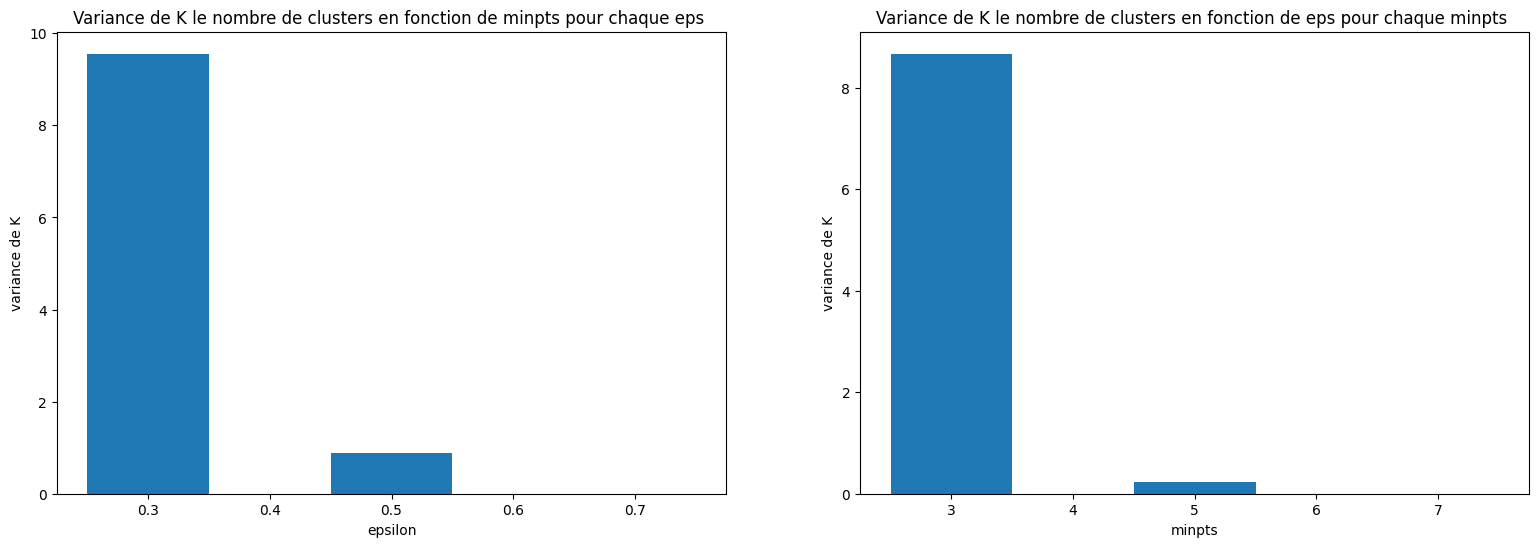

: 

In [14]:
# Supposons que vous avez les tableaux array1, array2, index1 et index2


var_eps_K = np.var(results[:, :, 0], axis=0)
var_minpts_K = np.var(results[:, :, 0], axis=1)
var_eps_Bruit = np.var(results[:, :, 1], axis=0)
var_minpts_Bruit = np.var(results[:, :, 1], axis=1)

eps = np.array(eps)
minpts = np.array(minpts)


# Largeur des barres
bar_width = 1
eps_bar_width = 0.10

# Créer la figure et les axes
plt.subplots(1, 2, figsize=(19, 6))

plt.subplot(1, 2, 1)
# Créer les barres pour le premier tableau
plt.bar(eps, var_eps_K, eps_bar_width, label='')
plt.xlabel('epsilon')
plt.ylabel('variance de K')
plt.title('Variance de K le nombre de clusters en fonction de minpts pour chaque eps ')
plt.subplot(1, 2 ,2)
# Créer les barres pour le deuxième tableau
plt.bar(minpts, var_minpts_K, bar_width, label='')

# Ajouter des labels et un titre
plt.xlabel('minpts')
plt.ylabel('variance de K')
plt.title('Variance de K le nombre de clusters en fonction de eps pour chaque minpts ')

# Afficher le graphique
plt.show()

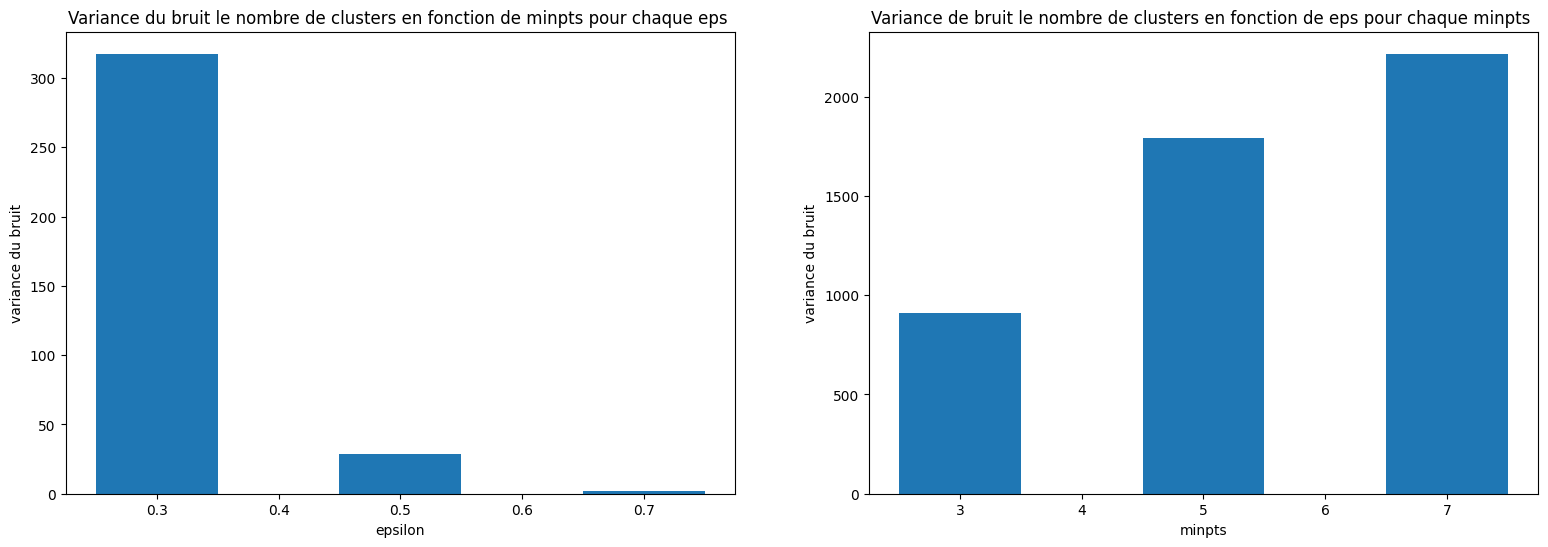

: 

In [15]:
# Supposons que vous avez les tableaux array1, array2, index1 et index2

eps = np.array(eps)
minpts = np.array(minpts)


# Largeur des barres
bar_width = 1
eps_bar_width = 0.10

# Créer la figure et les axes
plt.subplots(1, 2, figsize=(19, 6))

plt.subplot(1, 2, 1)
# Créer les barres pour le premier tableau
plt.bar(eps, var_eps_Bruit, eps_bar_width, label='')
plt.xlabel('epsilon')
plt.ylabel('variance du bruit')
plt.title('Variance du bruit le nombre de clusters en fonction de minpts pour chaque eps ')
plt.subplot(1, 2 ,2)
# Créer les barres pour le deuxième tableau
plt.bar(minpts, var_minpts_Bruit, bar_width, label='')

# Ajouter des labels et un titre
plt.xlabel('minpts')
plt.ylabel('variance du bruit')
plt.title('Variance de bruit le nombre de clusters en fonction de eps pour chaque minpts ')

# Afficher le graphique
plt.show()


# Données circulaires

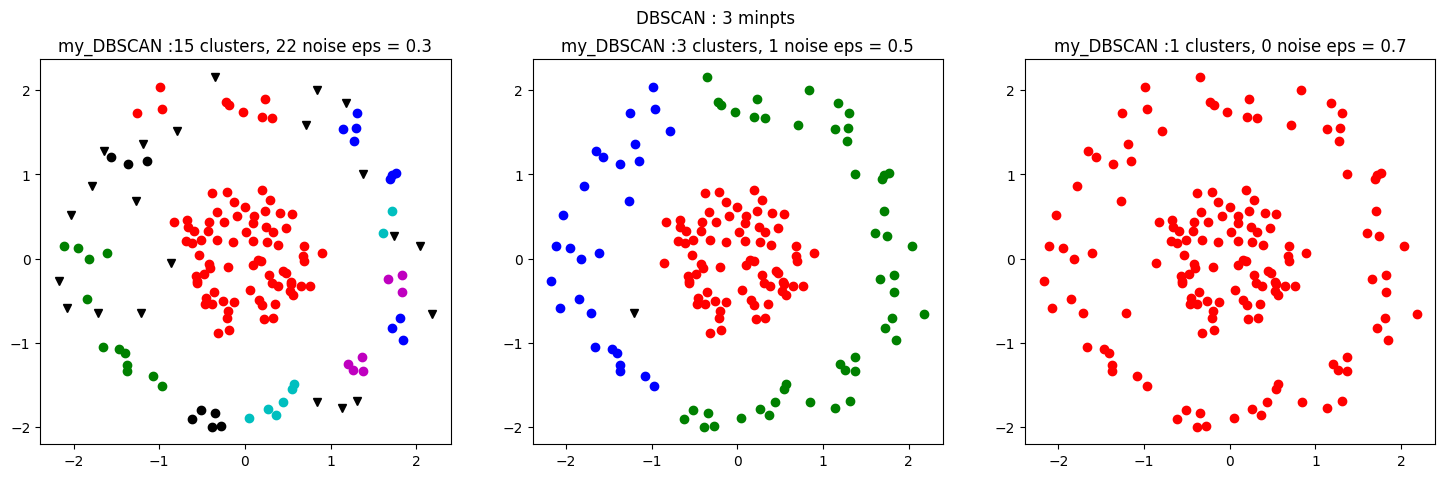

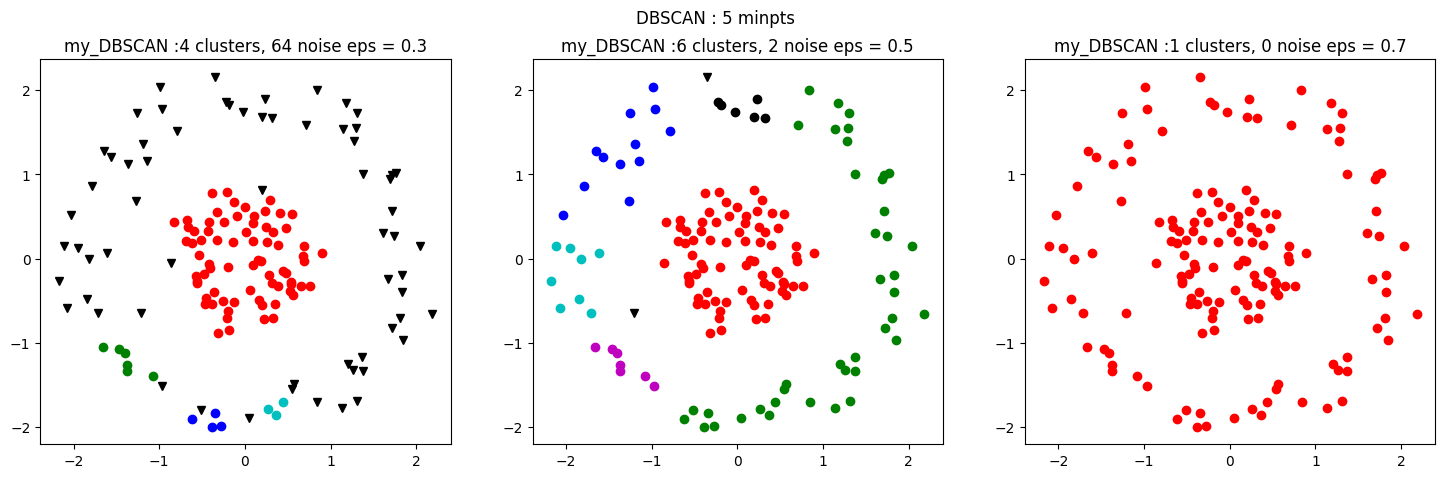

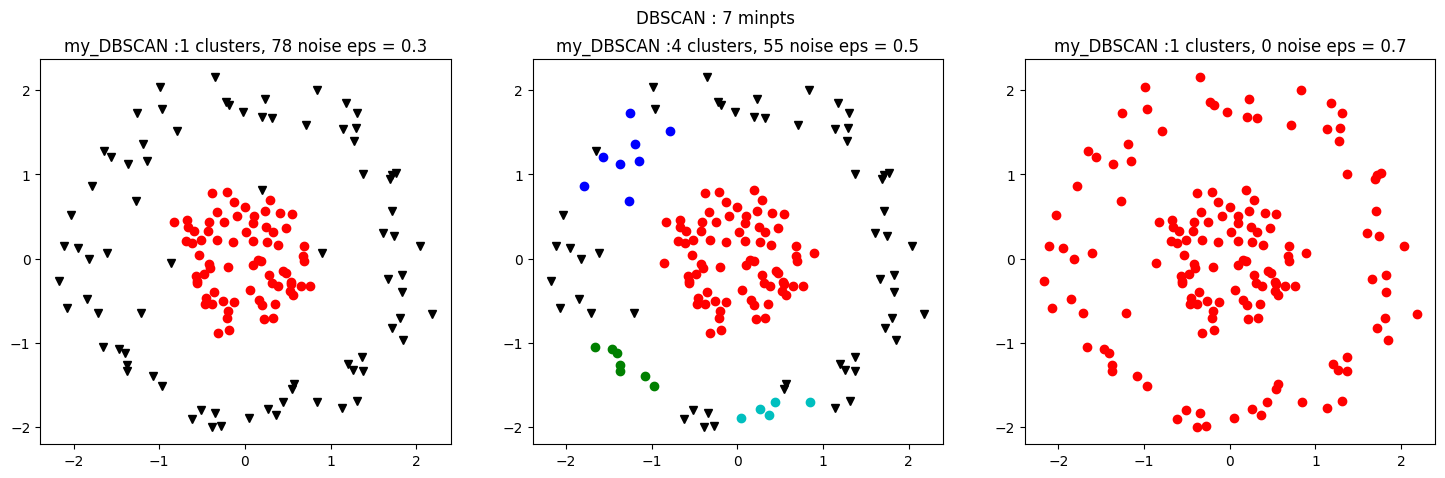

In [4]:
X_c, y = make_circles(n_samples=150, factor=0.3, noise=0.1)
X_c = StandardScaler().fit_transform(X_c)
results = []

for minpt in minpts:
    visualisation_iris(X_c, minpt)


In [6]:
results = np.array(results)
results = results.reshape((len(eps),len(minpts),2))
p = pd.DataFrame( index=eps, columns=minpts, )
for i in range(len(eps)):
    for j in range(len(minpts)):
        p.loc[eps[i],minpts[j]] = results[i,j]

print(p)

            3        5       7
0.3  [14, 30]   [4, 1]  [1, 0]
0.5   [2, 77]   [8, 4]  [1, 0]
0.7   [1, 80]  [4, 53]  [1, 0]


: 

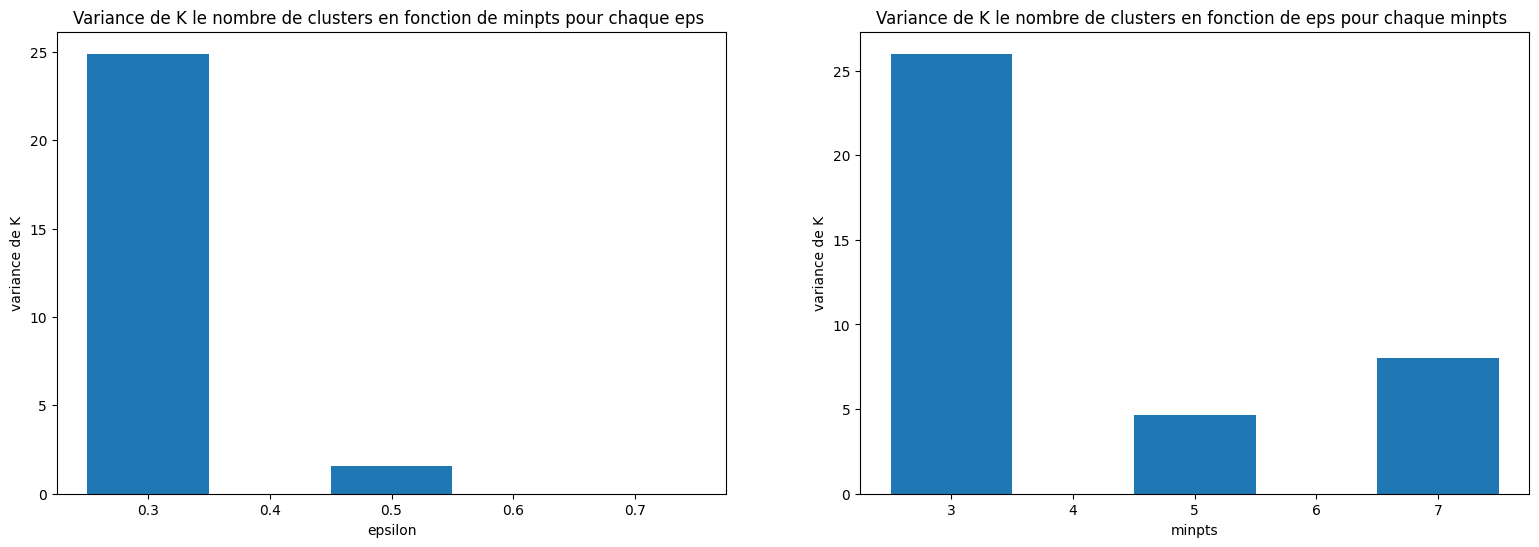

: 

In [20]:
# Supposons que vous avez les tableaux array1, array2, index1 et index2


var_eps_K = np.var(results[:, :, 0], axis=0)
var_minpts_K = np.var(results[:, :, 0], axis=1)
var_eps_Bruit = np.var(results[:, :, 1], axis=0)
var_minpts_Bruit = np.var(results[:, :, 1], axis=1)

eps = np.array(eps)
minpts = np.array(minpts)


# Largeur des barres
bar_width = 1
eps_bar_width = 0.10

# Créer la figure et les axes
plt.subplots(1, 2, figsize=(19, 6))

plt.subplot(1, 2, 1)
# Créer les barres pour le premier tableau
plt.bar(eps, var_eps_K, eps_bar_width, label='')
plt.xlabel('epsilon')
plt.ylabel('variance de K')
plt.title('Variance de K le nombre de clusters en fonction de minpts pour chaque eps ')
plt.subplot(1, 2 ,2)
# Créer les barres pour le deuxième tableau
plt.bar(minpts, var_minpts_K, bar_width, label='')

# Ajouter des labels et un titre
plt.xlabel('minpts')
plt.ylabel('variance de K')
plt.title('Variance de K le nombre de clusters en fonction de eps pour chaque minpts ')

# Afficher le graphique
plt.show()

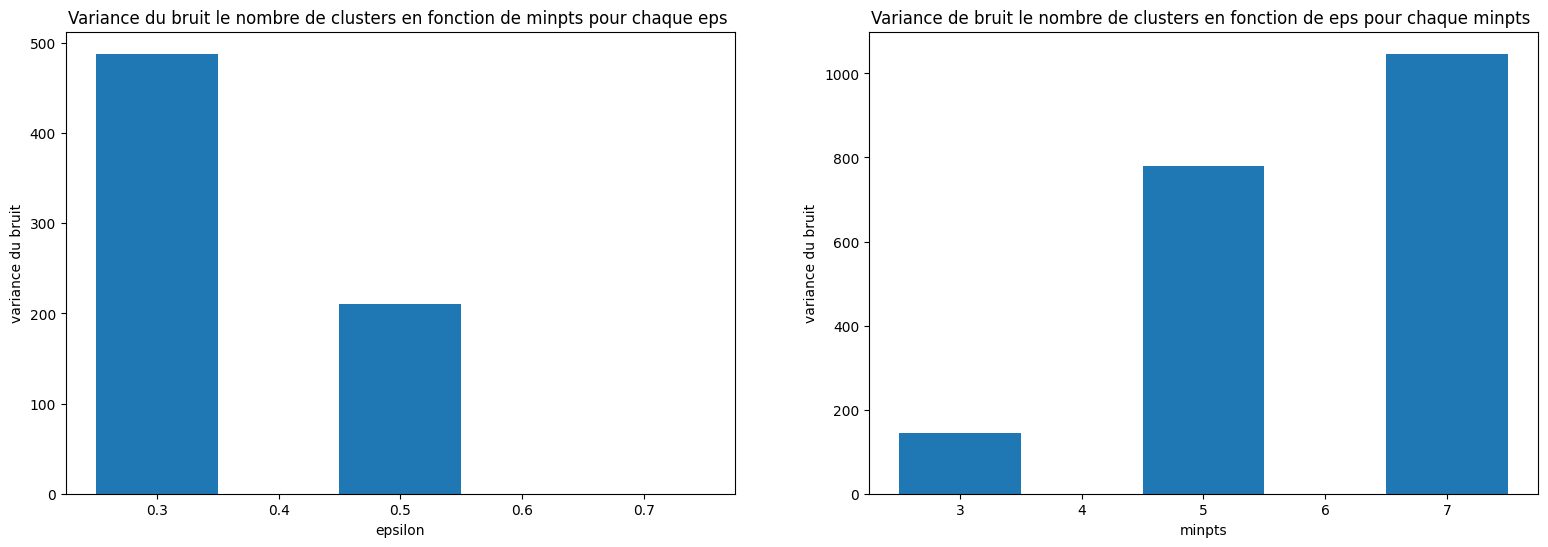

: 

In [21]:
# Supposons que vous avez les tableaux array1, array2, index1 et index2

eps = np.array(eps)
minpts = np.array(minpts)


# Largeur des barres
bar_width = 1
eps_bar_width = 0.10

# Créer la figure et les axes
plt.subplots(1, 2, figsize=(19, 6))

plt.subplot(1, 2, 1)
# Créer les barres pour le premier tableau
plt.bar(eps, var_eps_Bruit, eps_bar_width, label='')
plt.xlabel('epsilon')
plt.ylabel('variance du bruit')
plt.title('Variance du bruit le nombre de clusters en fonction de minpts pour chaque eps ')
plt.subplot(1, 2 ,2)
# Créer les barres pour le deuxième tableau
plt.bar(minpts, var_minpts_Bruit, bar_width, label='')

# Ajouter des labels et un titre
plt.xlabel('minpts')
plt.ylabel('variance du bruit')
plt.title('Variance de bruit le nombre de clusters en fonction de eps pour chaque minpts ')

# Afficher le graphique
plt.show()


# DBSCAN avec estimation des parametres

6  clusters trouvés 6
Clusters = [[0, 4, 7, 9, 10, 11, 17, 19, 20, 21, 23, 26, 27, 28, 31, 34, 35, 36, 37, 39, 40, 43, 46, 48, 49, 6, 1, 2, 12, 24, 25, 29, 30, 45, 47, 3, 5, 16, 18, 32, 44, 22, 38, 42, 8, 14, 33, 13, 15], [50, 52, 65, 76, 86, 77, 51, 54, 58, 74, 75, 56, 110, 147, 85, 91, 97, 63, 72, 126, 71, 70, 127, 115, 137, 145, 111, 112, 116, 128, 139, 55, 61, 73, 78, 138, 133, 83, 119, 123, 146, 149, 67, 82, 92, 96, 99, 136, 140, 148, 103, 141, 132, 104, 120, 124, 66, 84, 88, 90, 94, 95, 101, 142, 121, 69, 64, 79, 80, 89, 53, 100, 144, 143, 102, 113, 81, 59, 125, 130, 107, 129], [57, 60, 93, 98], [68, 87], [105, 122, 118], [117, 131]]
effectif cluster  49
effectif cluster  82
effectif cluster  4
effectif cluster  2
effectif cluster  3
effectif cluster  2
effectif  bruit 8


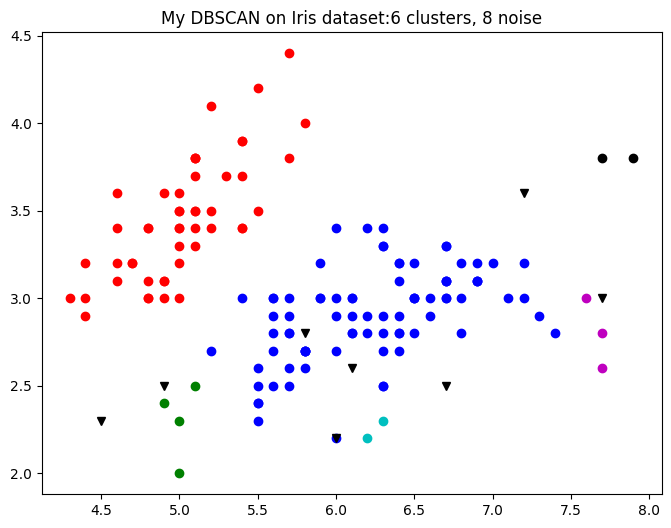

15  clusters trouvés 15
Clusters = [[0, 6, 12, 135, 140, 25, 26, 32, 36, 96, 116, 124, 139, 45, 110, 38, 84, 21, 50, 19, 83, 92, 138, 52, 86, 63, 9, 41, 148, 61, 44, 48, 75, 129, 49, 103, 39, 107, 40, 54, 104, 125, 133, 143, 146, 118, 85, 106, 17, 67, 82, 112, 114, 121, 37, 65, 95, 122, 149, 13, 91, 105, 144, 145, 76, 24, 53, 117, 43, 64, 68, 123, 71, 70, 108], [1, 42, 56, 23, 73], [2, 55, 89, 134], [3, 90, 126], [4, 62, 74, 10], [5, 78, 87, 98, 137, 142], [7, 20, 47, 69], [8, 16, 33, 72, 101], [14, 28, 119, 141], [15, 128, 131, 147], [18, 22, 51, 59, 35, 136], [27, 31, 60, 79, 81, 30, 77], [29, 80, 93, 97, 132], [46, 127, 111], [58, 120, 102, 130, 100, 109, 66]]
effectif cluster  75
effectif cluster  5
effectif cluster  4
effectif cluster  3
effectif cluster  4
effectif cluster  6
effectif cluster  4
effectif cluster  5
effectif cluster  4
effectif cluster  4
effectif cluster  6
effectif cluster  7
effectif cluster  5
effectif cluster  3
effectif cluster  7
effectif  bruit 8


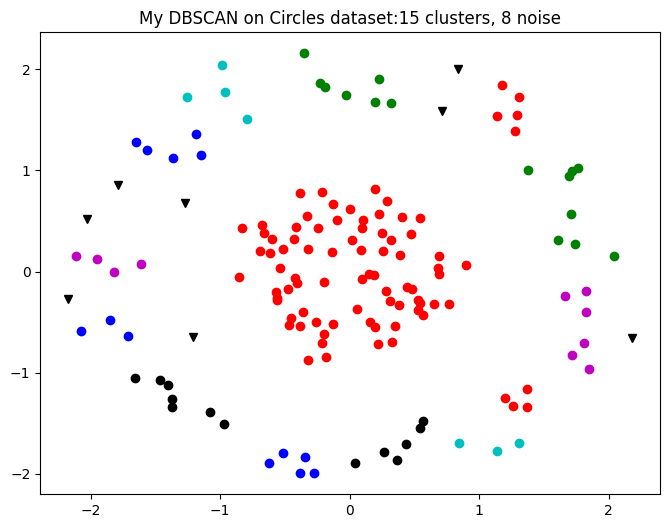

In [5]:
my_y = my_DBSCAN(X, Visualisation=True)
visualize_dbscan(X, my_y, title="My DBSCAN on Iris dataset")

my_y = my_DBSCAN(X_c, Visualisation=True)
visualize_dbscan(X_c, my_y, title="My DBSCAN on Circles dataset")
